# Olive Oil Export - Exploratory Data Analysis (EDA)

This notebook performs basic EDA on the generated dataset and saves charts to the `reports/` folder.

📊 OLIVE OIL EXPORT - EDA REPORT
✅ Dataset: 7,560 rows | 42 countries
⏰ Period: 2010-01-15 00:00:00 to 2024-09-28 00:00:00

🏆 TOP 5 EXPORT COUNTRIES (Total Tons):
Country
Italy     9342336
USA       9048166
France    8840246
Canada    8714706
China     7111416
Name: Export_Tons, dtype: int64


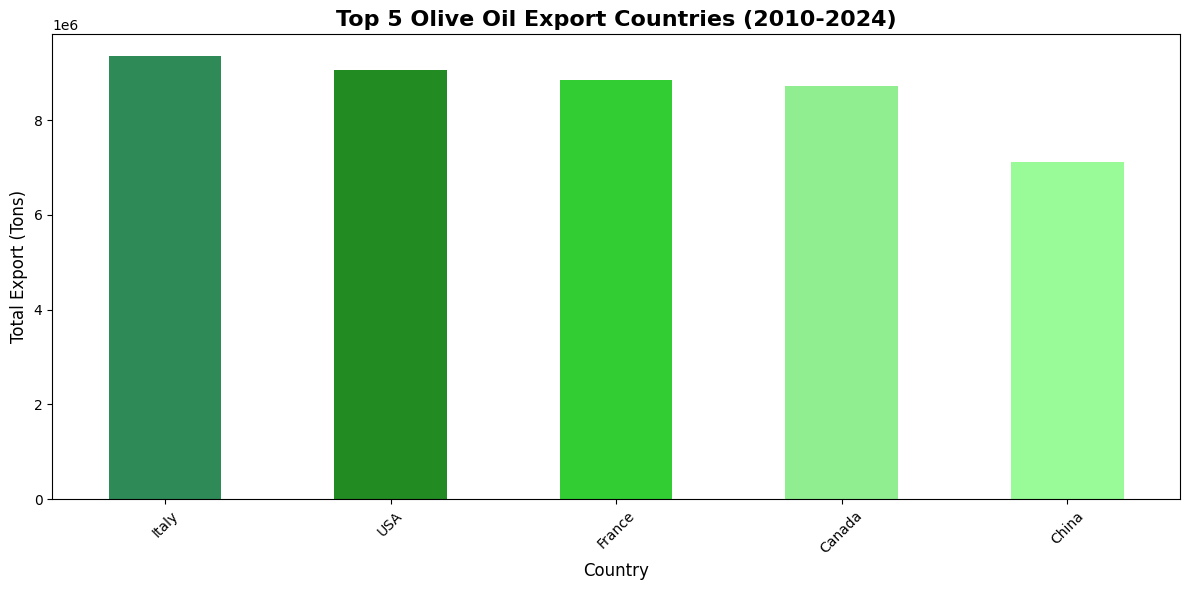


💰 AVERAGE PRICE BY SEASON ($/Liter):
Season
Ramadan    12.03
Spring     11.89
Summer     11.98
Winter     11.93
Name: USD_Price, dtype: float64


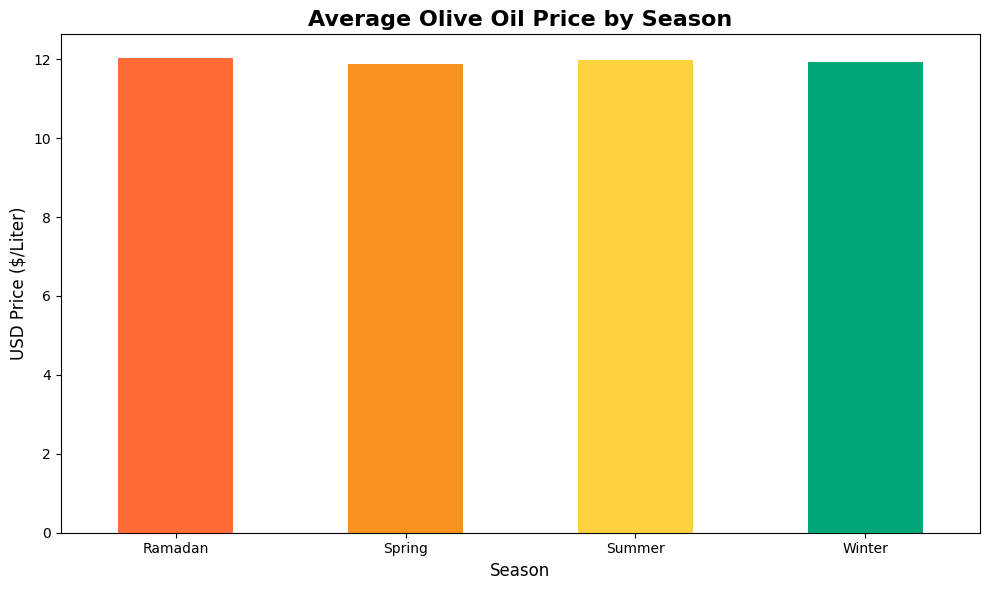


📈 FRANCE EXPORT TREND (2010-2024):
Year
2010    670780
2011    552391
2012    618721
2013    629919
2014    540545
2015    592528
2016    552210
2017    507879
2018    672011
2019    567420
2020    543909
2021    597761
2022    696413
2023    639165
2024    458594
Name: Export_Tons, dtype: int64


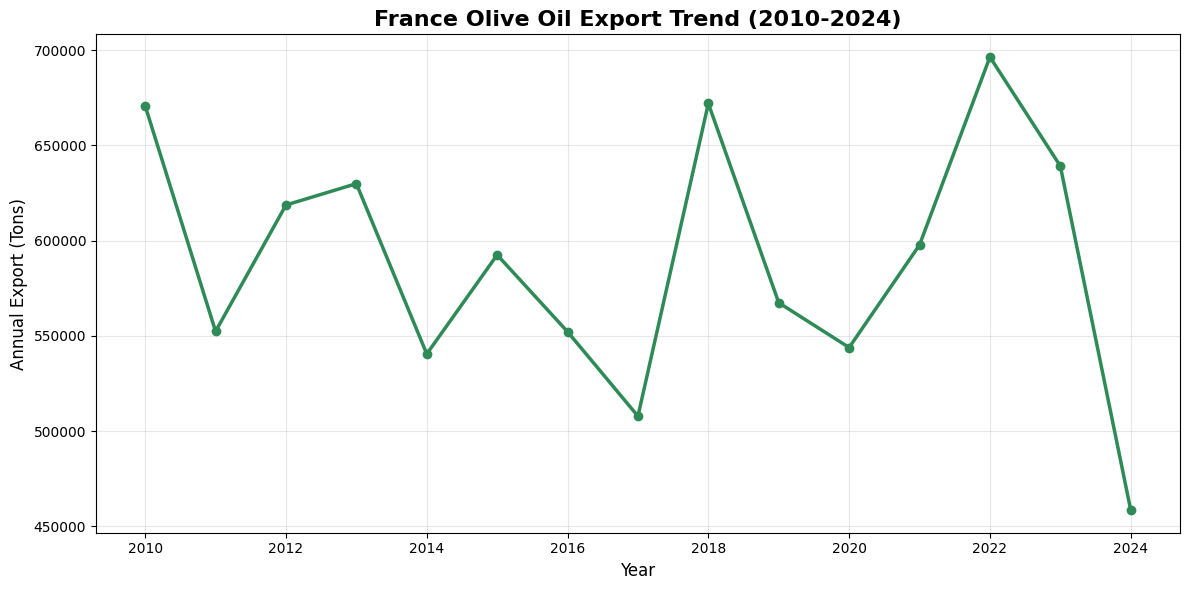


✅ EDA COMPLETE! 3 Charts saved in reports/
📁 Files: top5_countries.png | price_by_season.png | france_trend.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Read the data
df = pd.read_csv('../data/raw/tunisia_olive_oil_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create the reports folder
os.makedirs('../reports', exist_ok=True)

print("📊 OLIVE OIL EXPORT - EDA REPORT")
print(f"✅ Dataset: {len(df):,} rows | {df['Country'].nunique()} countries")
print(f"⏰ Period: {df['Date'].min()} to {df['Date'].max()}")

# 2. TOP 5 COUNTRIES (by total exports)
print("\n🏆 TOP 5 EXPORT COUNTRIES (Total Tons):")
top5 = df.groupby('Country')['Export_Tons'].sum().nlargest(5)
print(top5.round(0).astype(int))

# Plot 1: Bar chart for Top 5 countries
plt.figure(figsize=(12, 6))
top5.plot(kind='bar', color=['#2E8B57', '#228B22', '#32CD32', '#90EE90', '#98FB98'])
plt.title('Top 5 Olive Oil Export Countries (2010-2024)', fontsize=16, fontweight='bold')
plt.ylabel('Total Export (Tons)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/top5_countries.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. PRICE BY SEASON
print("\n💰 AVERAGE PRICE BY SEASON ($/Liter):")
season_price = df.groupby('Season')['USD_Price'].mean().round(2)
print(season_price)

# Plot 2: Bar chart for average price by season
plt.figure(figsize=(10, 6))
season_price.plot(kind='bar', color=['#FF6B35', '#F7931E', '#FFD23F', '#00A676'])
plt.title('Average Olive Oil Price by Season', fontsize=16, fontweight='bold')
plt.ylabel('USD Price ($/Liter)', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/price_by_season.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. EXPORT TREND (France)
print("\n📈 FRANCE EXPORT TREND (2010-2024):")
france = df[df['Country'] == 'France'].groupby('Year')['Export_Tons'].sum()
print(france.round(0).astype(int))

# Plot 3: Line chart for France export trend
plt.figure(figsize=(12, 6))
france.plot(kind='line', marker='o', color='#2E8B57', linewidth=2.5)
plt.title('France Olive Oil Export Trend (2010-2024)', fontsize=16, fontweight='bold')
plt.ylabel('Annual Export (Tons)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/france_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ EDA COMPLETE! 3 Charts saved in reports/")
print("📁 Files: top5_countries.png | price_by_season.png | france_trend.png")